In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

## Part 1

What is an optimization problem? 

- We aim to find the best state, according to some objective function. 
- An example of a state is the weights used in a machine learning model, such as a neural network
- State is represented by a one-dimensional vector 
- "Best" state is defined using the Cost Function/Fitness Function/Objective Function 
- Function takes in a State Array as Input and returns a Fitness Value as Output


We will make 3 steps to solve an optimization problem with mlrose:
 - 1) Define fitness function object
 - 2) Define an optimization problem object
 - 3) Select and run a randomized optimization algorithm

#### 1) Define Fitness Function Object

In [236]:
fitness1 = mlrose.FourPeaks(t_pct=0.1)

#fitness2 = mlrose.MaxKColor(edges=)
#fitness3 = mlrose.FlipFlop()

#### 2) Define an Optimization Problem Object

In [261]:
#this requires a LENGTH - we can tune this 

length = 100
problem1 = mlrose.DiscreteOpt(length = length, fitness_fn = fitness1, maximize = True, max_val = 2)

#### 3) Select and Run Randomized Optimization Algorithm

##### Find Optimzal Parameters for RHC, SA, GA, Mimic for the Four Peaks Problem 

##### Random Hill Climbing

restarts

In [262]:

restarts_list = np.arange(0, 11, 1)

restarts_probs = [.25, .50, .75, 1.0, 2.0]
problem_length = np.array(problem1.length)

restarts_list2 = np.dot(restarts_probs, problem_length)

restarts_list_full =  np.concatenate((restarts_list, restarts_list2))

for num in restarts_list_full:
    
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem1, restarts = int(num),
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)
    #print(best_state)
    print("restarts:",num, "best_fitness:",best_fitness)


restarts: 0.0 best_fitness: 1.0
restarts: 1.0 best_fitness: 1.0
restarts: 2.0 best_fitness: 3.0
restarts: 3.0 best_fitness: 3.0
restarts: 4.0 best_fitness: 4.0
restarts: 5.0 best_fitness: 4.0
restarts: 6.0 best_fitness: 5.0
restarts: 7.0 best_fitness: 5.0
restarts: 8.0 best_fitness: 5.0
restarts: 9.0 best_fitness: 5.0
restarts: 10.0 best_fitness: 8.0
restarts: 25.0 best_fitness: 9.0
restarts: 50.0 best_fitness: 13.0
restarts: 75.0 best_fitness: 13.0
restarts: 100.0 best_fitness: 13.0
restarts: 200.0 best_fitness: 13.0


max_attempts

In [303]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem1, restarts = 50,
                                                   max_attempts = int(num), max_iters = 1000,
                                                   random_state = 42)
    #print(best_state)
    print(best_fitness)


13.0
28.0
42.0
42.0
42.0


max_iters

In [264]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    
    best_state, best_fitness = mlrose.random_hill_climb(problem=problem1, restarts = 10,
                                                   max_attempts = 10, max_iters = int(num),
                                                    random_state = 42)
    #print(best_state)
    print(best_fitness)


8.0
8.0
8.0
8.0
8.0


##### Simulated Annealing

In [265]:
scheduleG = mlrose.GeomDecay()
scheduleA = mlrose.ArithDecay()
scheduleE = mlrose.ExpDecay()

best_state, best_fitness = mlrose.simulated_annealing(problem=problem1, schedule = scheduleG,
                                               max_attempts = 10, max_iters = 1000,
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

32.0


In [266]:
best_state, best_fitness = mlrose.simulated_annealing(problem=problem1, schedule = scheduleA,
                                               max_attempts = 10, max_iters = 1000,
                                               #init_state=init_state, 
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

14.0


In [267]:
best_state, best_fitness = mlrose.simulated_annealing(problem=problem1, schedule = scheduleE,
                                               max_attempts = 10, max_iters = 1000,
                                               #init_state=init_state, 
                                                    random_state = 42)

#print(best_state)

print(best_fitness)

18.0


Max Attempts

In [268]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem1, schedule = scheduleG,
                                                   max_attempts = num, max_iters = 1000,
                                                   #init_state=init_state, 
                                                        random_state = 42)

    #print(best_state)
    print(best_fitness)


32.0
32.0
32.0
32.0
32.0


Max Iters

In [269]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    
    best_state, best_fitness = mlrose.simulated_annealing(problem=problem1, schedule = scheduleG,
                                                   max_attempts = 10, max_iters = num,
                                                   #init_state=init_state, 
                                                        random_state = 42)
    
    #print(best_state)
    print(best_fitness)


1.0
1.0
32.0
51.0
51.0


##### Genetic Alg

In [270]:
best_state, best_fitness = mlrose.genetic_alg(problem=problem1, 
                                              pop_size = 200, mutation_prob = 0.1,
                                              max_attempts = 10, max_iters = 1000,
                                               random_state = 42)


print(best_fitness)

114.0


pop_size

In [271]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0, 7.0, 10.0]
problem_length = problem1.length

for num in pop_size_list:
    size =  problem_length*num
    best_state, best_fitness = mlrose.genetic_alg(problem=problem1, 
                                                  pop_size = int(size), mutation_prob = 0.1,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    print("pop_size:", size, " best_fitness:", best_fitness)


pop_size: 10.0  best_fitness: 8.0
pop_size: 25.0  best_fitness: 15.0
pop_size: 50.0  best_fitness: 26.0
pop_size: 75.0  best_fitness: 16.0
pop_size: 100.0  best_fitness: 115.0
pop_size: 150.0  best_fitness: 14.0
pop_size: 200.0  best_fitness: 114.0
pop_size: 250.0  best_fitness: 17.0
pop_size: 300.0  best_fitness: 117.0
pop_size: 500.0  best_fitness: 120.0
pop_size: 700.0  best_fitness: 113.0
pop_size: 1000.0  best_fitness: 117.0


mutation_prob

In [248]:
mutation_prob_list = np.arange(0.1, 1, 0.1) 

for num in mutation_prob_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem1, 
                                                  pop_size = 200, mutation_prob = num,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    print("mutation_prob:", num, "best_fitness:", best_fitness)

mutation_prob: 0.1 best_fitness: 114.0
mutation_prob: 0.2 best_fitness: 17.0
mutation_prob: 0.30000000000000004 best_fitness: 13.0
mutation_prob: 0.4 best_fitness: 12.0
mutation_prob: 0.5 best_fitness: 13.0
mutation_prob: 0.6 best_fitness: 12.0
mutation_prob: 0.7000000000000001 best_fitness: 15.0
mutation_prob: 0.8 best_fitness: 14.0
mutation_prob: 0.9 best_fitness: 12.0


max_attempts

In [194]:
max_attempts_list = [10, 100, 1000, 10000, 100000]

for num in max_attempts_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem1, 
                                                  pop_size = 5*problem1.length, mutation_prob = 0.1,
                                                   max_attempts = num, max_iters = 1000,
                                                    random_state = 42)

    print("max_attempts",num ," best_fitness:", best_fitness)


max_attempts 10  best_fitness: 120.0
max_attempts 100  best_fitness: 122.0
max_attempts 1000  best_fitness: 127.0
max_attempts 10000  best_fitness: 127.0
max_attempts 100000  best_fitness: 127.0


max_iters

In [195]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    best_state, best_fitness = mlrose.genetic_alg(problem=problem1, 
                                                  pop_size = 5*problem1.length, mutation_prob = 0.1,
                                                   max_attempts = 10, max_iters = num,
                                                        random_state = 42)

    print("max_iters",num ," best_fitness:", best_fitness)


max_iters 10  best_fitness: 112.0
max_iters 100  best_fitness: 120.0
max_iters 1000  best_fitness: 120.0
max_iters 10000  best_fitness: 120.0
max_iters 100000  best_fitness: 120.0


##### Mimic 

keep_pct

In [196]:
keep_pct_list = np.arange(0.1, 1, 0.1) 

for num in keep_pct_list:
    best_state, best_fitness = mlrose.mimic(problem=problem1, 
                                                  pop_size = 200, keep_pct = num,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)

    print("keep_pct:", num," best_fitness:",best_fitness)

keep_pct: 0.1  best_fitness: 114.0
keep_pct: 0.2  best_fitness: 20.0
keep_pct: 0.30000000000000004  best_fitness: 26.0
keep_pct: 0.4  best_fitness: 115.0
keep_pct: 0.5  best_fitness: 13.0
keep_pct: 0.6  best_fitness: 12.0
keep_pct: 0.7000000000000001  best_fitness: 12.0
keep_pct: 0.8  best_fitness: 11.0
keep_pct: 0.9  best_fitness: 11.0


pop_size

pop_size varies, keep_pct = 40%

In [296]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0, 7.5, 10]
problem_length = problem1.length


for num in pop_size_list:
    size =  num * problem_length
    
    best_state, best_fitness = mlrose.mimic(problem=problem1, 
                                                  pop_size = int(size), keep_pct = 0.40,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)


    print("pop_size:", size, " best_fitness:",best_fitness)

pop_size: 10.0  best_fitness: 6.0
pop_size: 25.0  best_fitness: 9.0
pop_size: 50.0  best_fitness: 14.0
pop_size: 75.0  best_fitness: 113.0
pop_size: 100.0  best_fitness: 13.0
pop_size: 150.0  best_fitness: 18.0
pop_size: 200.0  best_fitness: 115.0
pop_size: 250.0  best_fitness: 21.0
pop_size: 300.0  best_fitness: 22.0
pop_size: 500.0  best_fitness: 115.0
pop_size: 750.0  best_fitness: 26.0
pop_size: 1000  best_fitness: 36.0


pop_size varies, keep_pct = 10%

In [293]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0, 7.5, 10]
problem_length = problem1.length


for num in pop_size_list:
    size =  num * problem_length
    
    best_state, best_fitness = mlrose.mimic(problem=problem1, 
                                                  pop_size = int(size), keep_pct = 0.10,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)


    print("pop_size:", size, " best_fitness:",best_fitness)

pop_size: 10.0  best_fitness: 6.0
pop_size: 25.0  best_fitness: 8.0
pop_size: 50.0  best_fitness: 12.0
pop_size: 75.0  best_fitness: 14.0
pop_size: 100.0  best_fitness: 14.0
pop_size: 150.0  best_fitness: 12.0
pop_size: 200.0  best_fitness: 114.0
pop_size: 250.0  best_fitness: 113.0
pop_size: 300.0  best_fitness: 122.0
pop_size: 500.0  best_fitness: 144.0
pop_size: 750.0  best_fitness: 120.0
pop_size: 1000  best_fitness: 147.0


In [302]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0, 7.5, 10]
problem_length = problem1.length

for num in pop_size_list:
    size =  num * problem_length
    
    best_state, best_fitness = mlrose.mimic(problem=problem1, 
                                                  pop_size = int(size), keep_pct = 0.20,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42)


    print("pop_size:", size, " best_fitness:",best_fitness)

pop_size: 10.0  best_fitness: 6.0
pop_size: 25.0  best_fitness: 10.0
pop_size: 50.0  best_fitness: 14.0
pop_size: 75.0  best_fitness: 15.0
pop_size: 100.0  best_fitness: 13.0
pop_size: 150.0  best_fitness: 17.0
pop_size: 200.0  best_fitness: 20.0
pop_size: 250.0  best_fitness: 23.0
pop_size: 300.0  best_fitness: 130.0
pop_size: 500.0  best_fitness: 134.0
pop_size: 750.0  best_fitness: 131.0
pop_size: 1000  best_fitness: 119.0


In [297]:
pop_size_list = [.10, .25, .50, .75, 1.0, 1.50, 2.0, 2.50, 3.0, 5.0, 7.5, 10.0]
problem_length = problem1.length

mimic_dict = {'pop_size':[],
          'best_fitness':[],
         'curve':[]}

for num in pop_size_list:
    size =  num * problem_length
    
    best_state, best_fitness, curve = mlrose.mimic(problem=problem1, 
                                                  pop_size = int(size), keep_pct = 0.10,
                                                   max_attempts = 10, max_iters = 1000,
                                                        random_state = 42, curve = True)
    mimic_dict['pop_size'].append(size)
    mimic_dict['best_fitness'].append(best_fitness)
    mimic_dict['curve'].append(curve)
    
    print("pop_size:", size, " best_fitness:",best_fitness)

pop_size: 10.0  best_fitness: 6.0
pop_size: 25.0  best_fitness: 8.0
pop_size: 50.0  best_fitness: 12.0
pop_size: 75.0  best_fitness: 14.0
pop_size: 100.0  best_fitness: 14.0
pop_size: 150.0  best_fitness: 12.0
pop_size: 200.0  best_fitness: 114.0
pop_size: 250.0  best_fitness: 113.0
pop_size: 300.0  best_fitness: 122.0
pop_size: 500.0  best_fitness: 144.0
pop_size: 750.0  best_fitness: 120.0
pop_size: 1000.0  best_fitness: 147.0


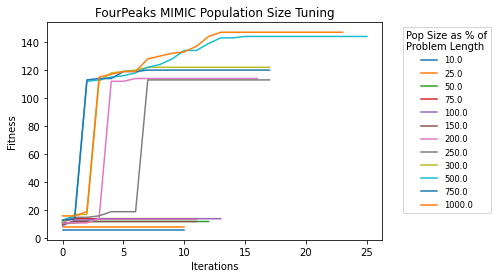

In [312]:
for i in range(len(mimic_dict['curve'])):
    y = mimic_dict['curve'][i]
    label = mimic_dict['pop_size'][i]

    plt.plot(y, label=label)

plt.title("FourPeaks MIMIC Population Size Tuning")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
plt.legend(title='Pop Size as % of\nProblem Length', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()

max_attempts

In [201]:
max_attempts_list = [10, 100, 1000]

for num in max_attempts_list:
    
    best_state, best_fitness = mlrose.mimic(problem=problem1, 
                                              pop_size = problem1.length*5, keep_pct = 0.40,
                                               max_attempts = int(num), max_iters = 1000,
                                                    random_state = 42)


    print("max_attempts:", num, " best_fitness:",best_fitness)
    

max_attempts: 10  best_fitness: 115.0
max_attempts: 100  best_fitness: 115.0
max_attempts: 1000  best_fitness: 115.0


KeyboardInterrupt: 

max_iters

In [199]:
max_iters_list = [10, 100, 1000, 10000, 100000]

for num in max_iters_list:
    
    best_state, best_fitness = mlrose.mimic(problem=problem1, 
                                              pop_size = problem1.length*5, keep_pct = 0.40,
                                               max_attempts = 10, max_iters = int(num),
                                                    random_state = 42)


    print("max_iters:", num, " best_fitness:",best_fitness)


max_iters: 10  best_fitness: 22.0
max_iters: 100  best_fitness: 115.0
max_iters: 1000  best_fitness: 115.0
max_iters: 10000  best_fitness: 115.0
max_iters: 100000  best_fitness: 115.0
